#### Task:- Get Basic Sales Summary from a Tiny SQLite Database using Python

#####  Objective: Use SQL inside Python to pull simple sales info (like total quantity sold, total revenue), and display it using basic print statements and a simple bar chart.

Step 1 – Create the Database and Table

In [ ]:
import sqlite3 # Import sqlite3 to handle SQLite database operations

# Connect to SQLite (creates file if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Commit & close (for now)
conn.commit()
conn.close()

print("Database and table created successfully.")


Database and table created successfully.


Step 2 – Insert Sample Data

In [ ]:
# Reconnect
conn = sqlite3.connect("sales_data.db") # Connect to the database
cursor = conn.cursor() # Create a cursor object



# 15 rows of data
sample_data = [
    ("Apples", 10, 2.5),
    ("Bananas", 5, 1.2),
    ("Cherries", 7, 3.0),
    ("Apples", 8, 2.5),
    ("Bananas", 12, 1.2),
    ("Cherries", 4, 3.0),
    ("Oranges", 9, 2.0),
    ("Mangoes", 6, 3.5),
    ("Apples", 11, 2.5),
    ("Bananas", 7, 1.2),
    ("Cherries", 5, 3.0),
    ("Oranges", 10, 2.0),
    ("Mangoes", 4, 3.5),
    ("Apples", 13, 2.5),
    ("Bananas", 9, 1.2)
]

# Insert data
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data) # Insert sample data into the sales table

# Commit & close
conn.commit()
conn.close()

print("15 sample rows inserted.")


15 sample rows inserted.


Step 3 – Query Data and Display Summary

In [ ]:
import pandas as pd

# Connect and run query
conn = sqlite3.connect("sales_data.db") # Connect to the database
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn) # Read the query results into a DataFrame
conn.close()

# Display results
print("Sales Summary:\n")
print(df)


Sales Summary:

    product  total_qty  revenue
0    Apples         60    150.0
1   Bananas         50     60.0
2  Cherries         27     81.0
3   Mangoes         10     35.0
4   Oranges         19     38.0


Step 4 – Plot Revenue by Product

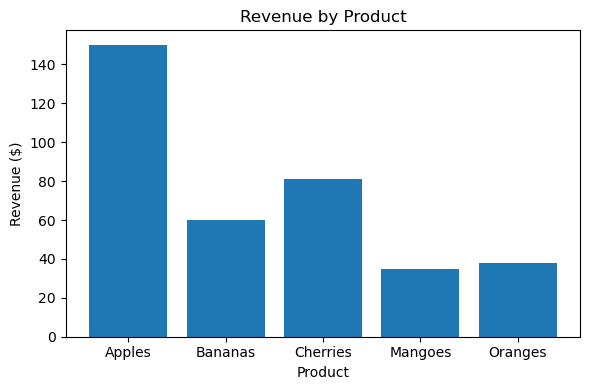

In [10]:
import matplotlib.pyplot as plt  # Import matplotlib for data visualization

plt.figure(figsize=(6,4))# Set the figure size
plt.bar(df['product'], df['revenue'])# Create a bar chart
plt.title("Revenue by Product")# Set the title
plt.xlabel("Product")# Set the x-label
plt.ylabel("Revenue ($)")# Set the y-label
plt.tight_layout()# Adjust layout
plt.savefig("sales_revenue_by_product.png")  # Save the plot as an image file

plt.show()# Show the plot
